In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [2]:
df = pd.read_csv('df.csv')

# Outliers 

### The computetions() and max() value difference  tells about the presence of outliers.

In [39]:
df['Volume Sold (Liters)'].describe()

count    1.249957e+07
mean     7.493523e+00
std      2.684431e+01
min      0.000000e+00
25%      1.500000e+00
50%      3.000000e+00
75%      9.000000e+00
max      1.500000e+04
Name: Volume Sold (Liters), dtype: float64

### The visual representation of outliers

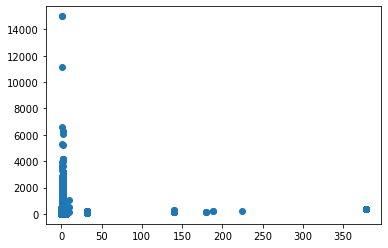

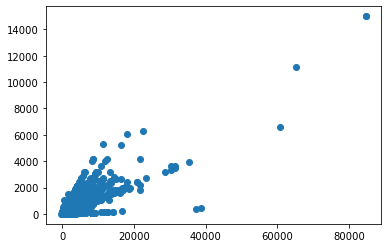

In [40]:
for col in df.columns[:-1]:    
    plt.scatter(df[col], df['Volume Sold (Liters)']) 
    plt.show()

# Plotting the outliers.

---------------------------------------------------------------------------------
The number of anomalies (the actual score) : 

 1    12487079
-1       12493
Name: anomalies_score, dtype: int64


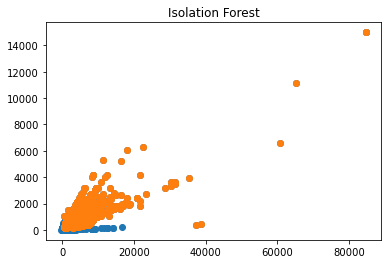

In [4]:
from sklearn.ensemble import IsolationForest 

# Getting a copy of the actual data.
df2 = df.copy()  

# Applying the model on the data sample
df2['anomalies_score']=pd.Series(IsolationForest(n_estimators=200,contamination=float(0.001)).fit_predict(df2.values))    

print('---------------------------------------------------------------------------------') 
# Printing the score. Either -1 or 1.
print('The number of anomalies (the actual score) : \n') 
print(df2['anomalies_score'].value_counts())   

# Reassigning the dataframe with anomalies
df2=df2[df2.anomalies_score ==-1]   

# Dropping the score
df2=df2.drop(['anomalies_score'], axis=1)   

# Plotting
plt.scatter(df['Total Margin'], df['Volume Sold (Liters)']) 
plt.scatter(df2['Total Margin'], df2['Volume Sold (Liters)']) 
plt.title('Isolation Forest')
plt.show() 

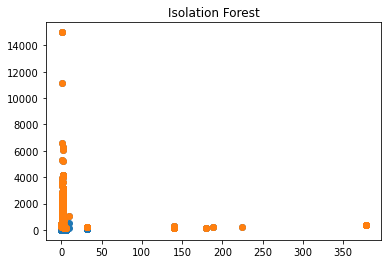

In [6]:
# Another feature plot
plt.scatter(df['Bottle Volume'], df['Volume Sold (Liters)']) 
plt.scatter(df2['Bottle Volume'], df2['Volume Sold (Liters)']) 
plt.title('Isolation Forest')
plt.show() 

# Testing the linear regression on outliers/no-outliers samples and also plotting the weights.


In [34]:
def lr_score(df):
    """" 
    X : independent vars 
    y : dependent vars   
    
    """ 
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values 

    # Splitting the data in Training set and Testing's
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

    # Fitting the data in the LR model
    from sklearn.linear_model import LinearRegression
    lr = LinearRegression() 
    lr.fit(X_train, y_train) 

    # Predicting 
    y_pred = lr.predict(X_test)   
    
    # Printing the score
    print(lr.score(X,y)) 
    
    
    from sklearn.metrics import mean_squared_error, mean_absolute_error  
    print(f' Mean Squared err = {mean_squared_error(y_pred, y_test)} \n Mean Abs err = {mean_absolute_error(y_pred, y_test)}') 
    
    # plotting stuff 
    fig = plt.figure(figsize = (40, 20))
 
    # creating the bar plot
    plt.bar(df.columns[:-1] , abs(lr.coef_), color ='maroon',
            width = 0.4)
    plt.show()

## With outliers

0.7273926783998858
 Mean Squared err = 188.1441431291468 
 Mean Abs err = 3.257868817685284


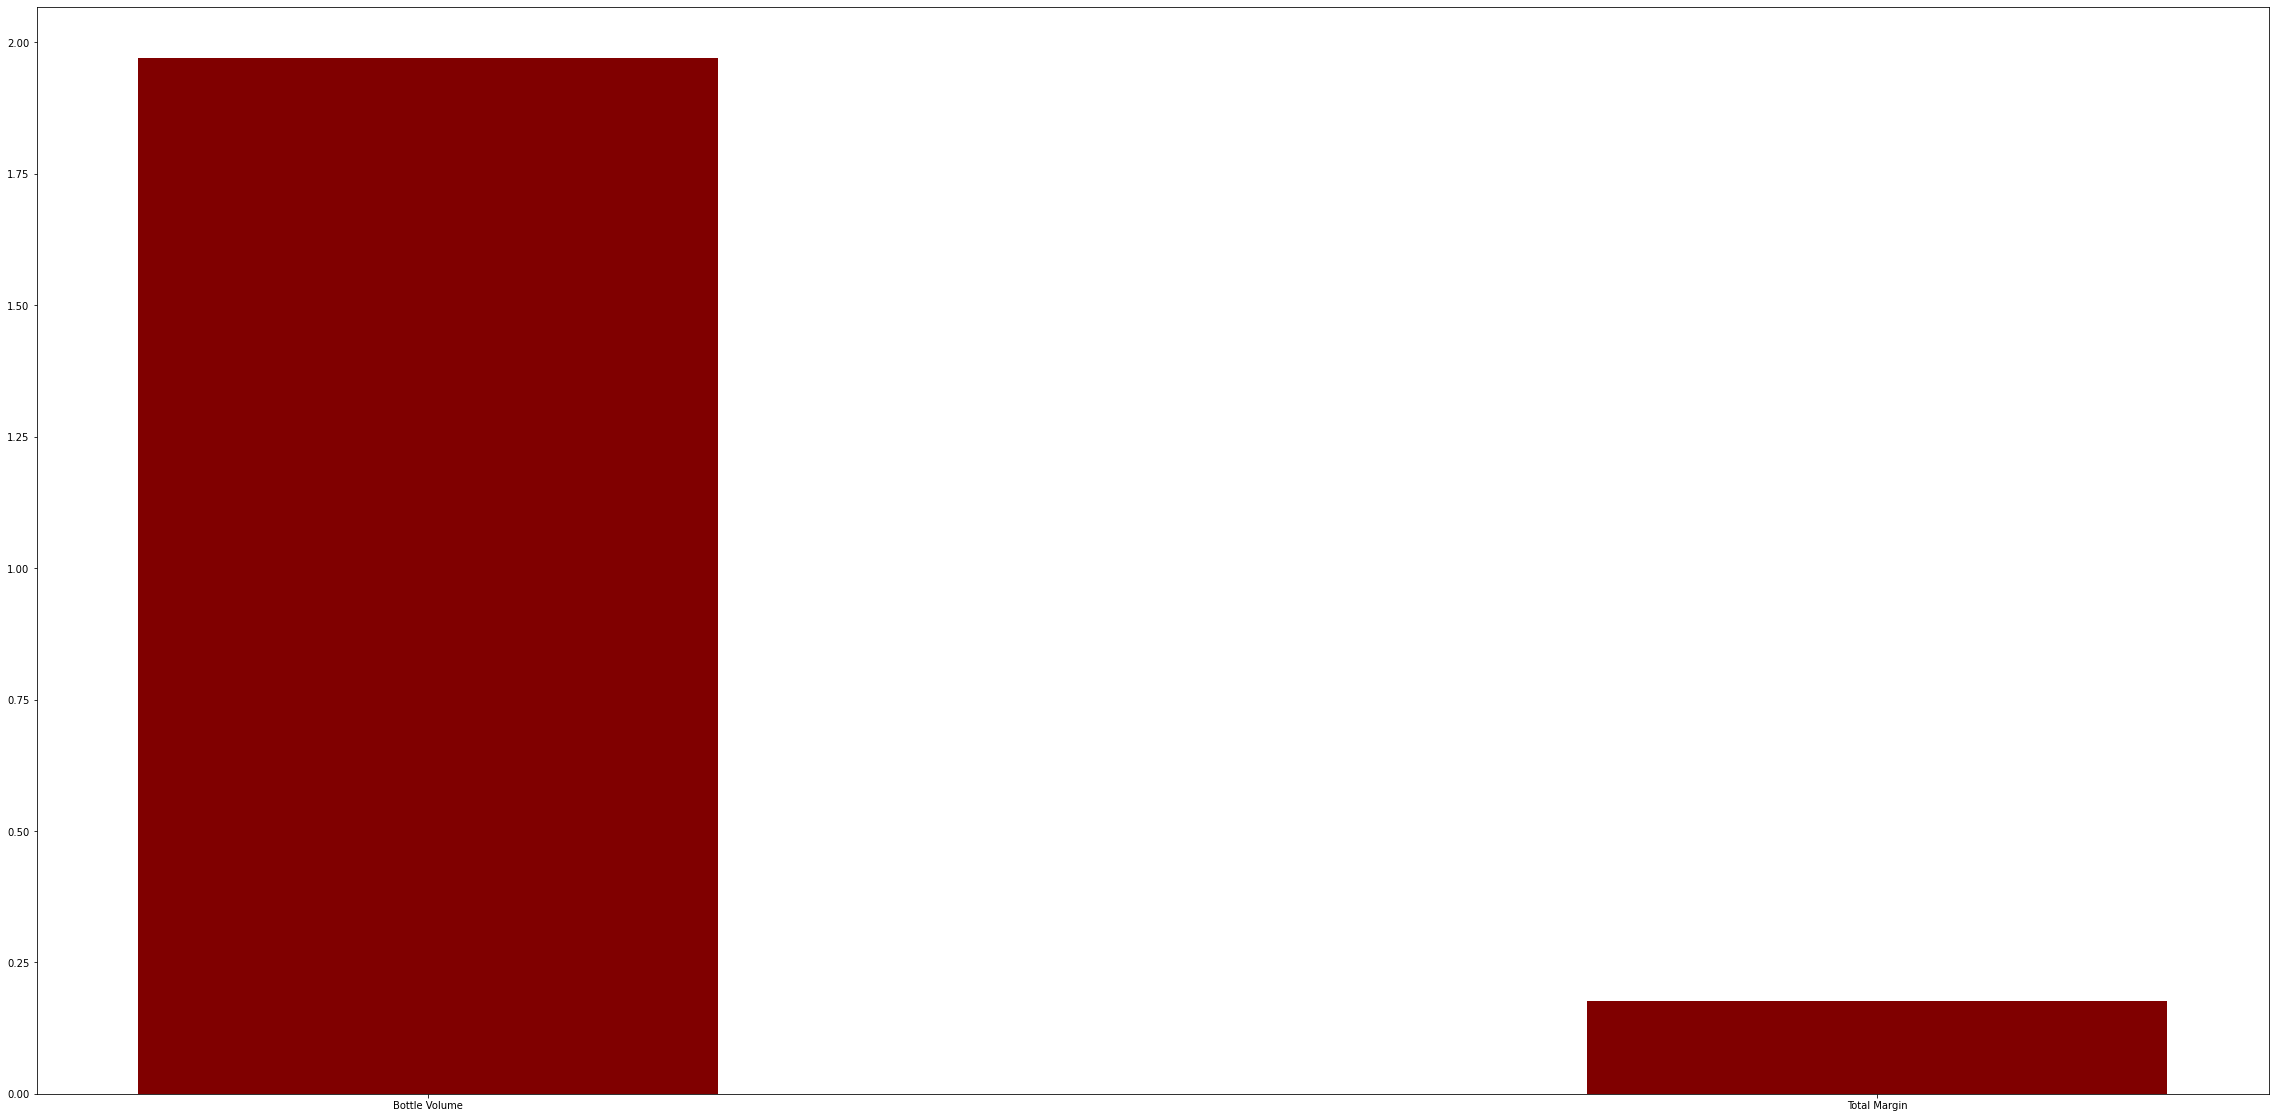

In [35]:
lr_score(df)

## Without outliers

0.6656026828432925
 Mean Squared err = 58.243627334666066 
 Mean Abs err = 2.957945603221284


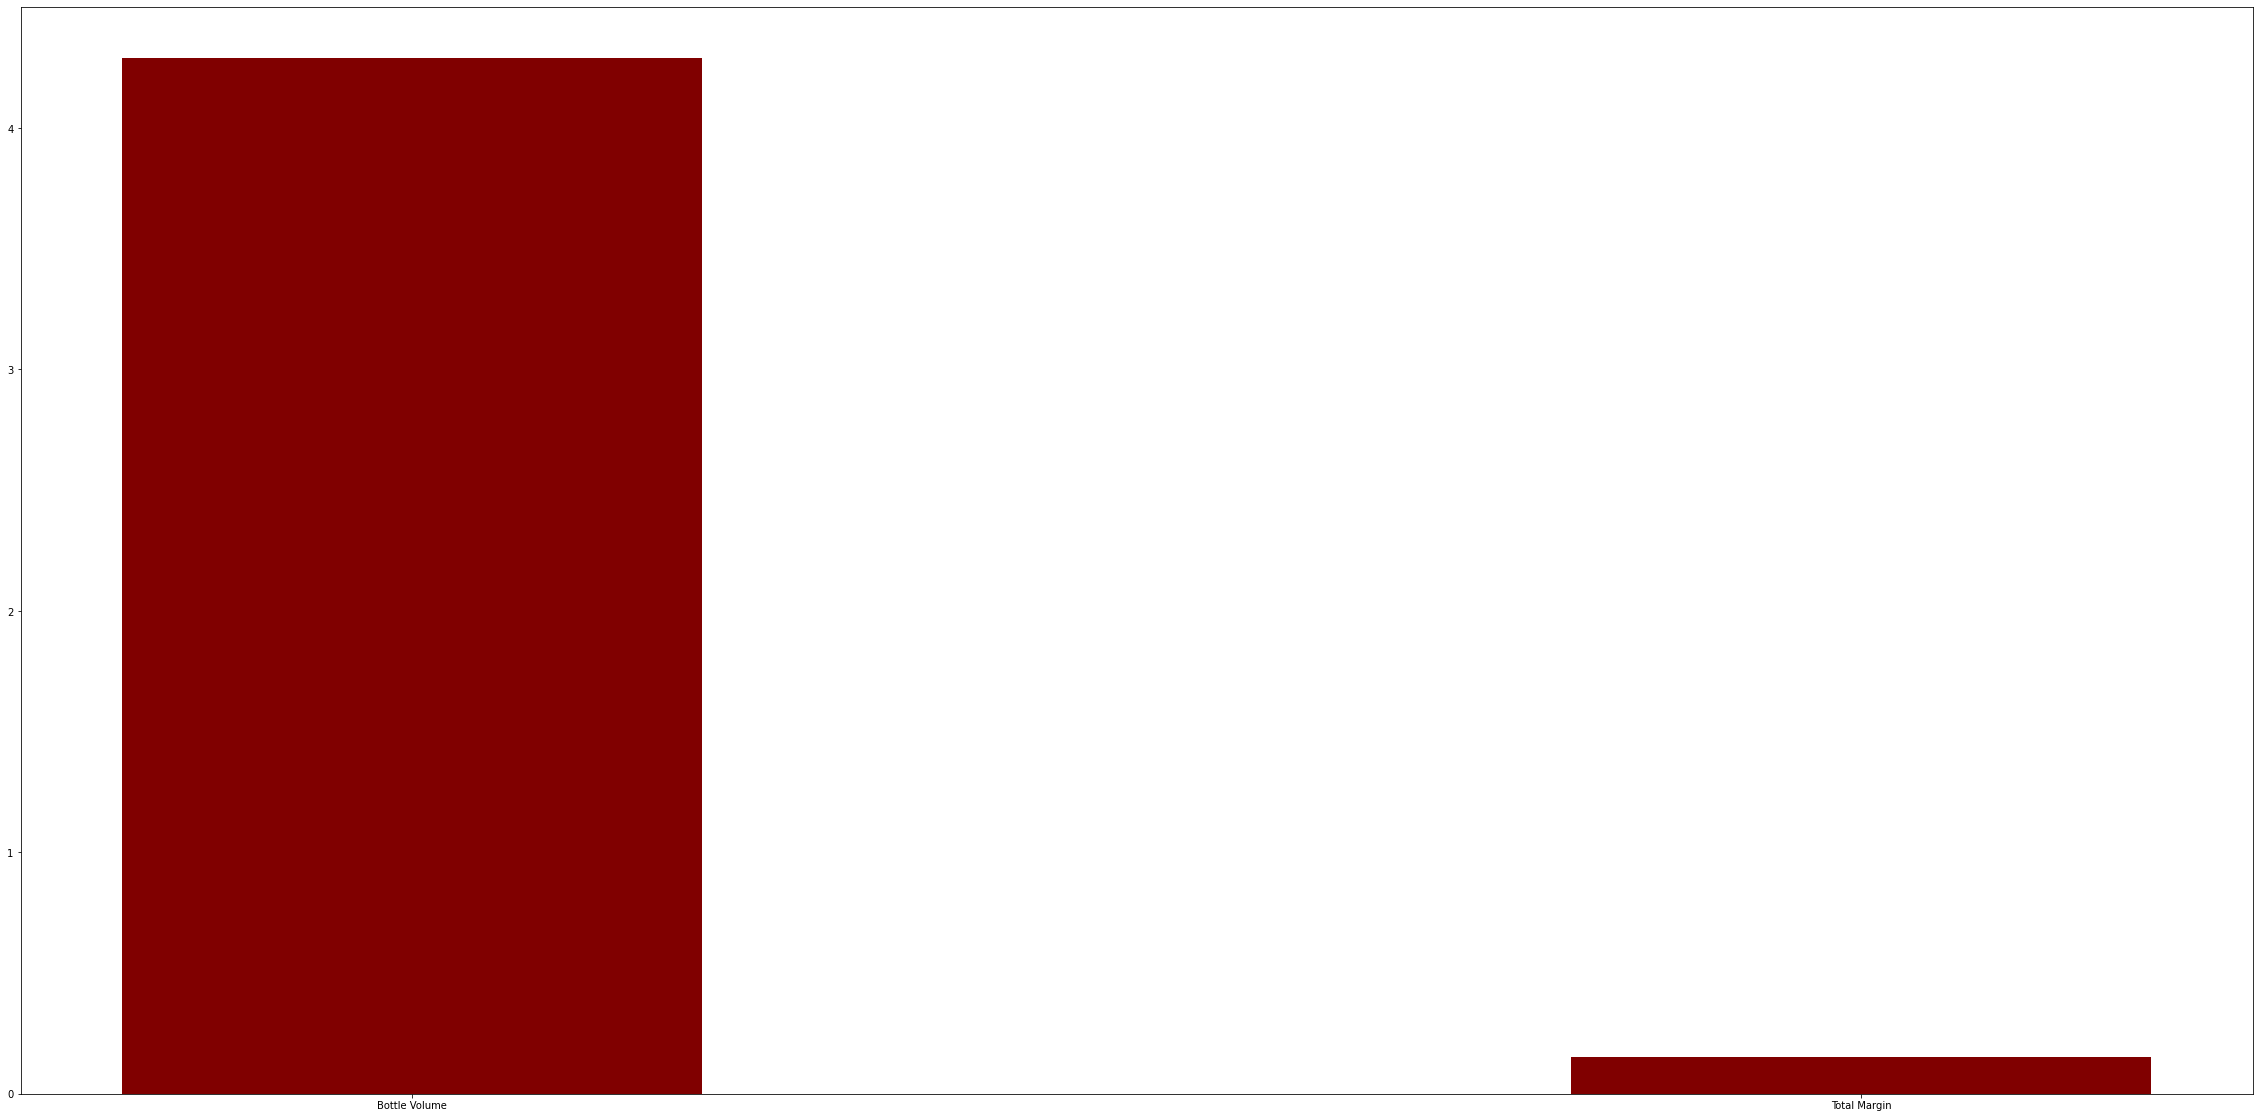

In [36]:
# Dropping the outliers.
lr_score(df.drop( df2.index.values.tolist() , axis = 0))

# Testing the Random Forest Regressor on the actual data with outliers.

In [37]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values 

# Splitting the data in Training set and Testing's
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)  

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)   
rfr.fit(X_train, y_train) 
y_pred = rfr.predict(X_test) 
print(rfr.score(X,y)) 

from sklearn.metrics import mean_squared_error, mean_absolute_error   
print(f' Mean Squared err = {mean_squared_error(y_pred, y_test)} \n Mean Abs err = {mean_absolute_error(y_pred, y_test)}')

0.9700257854142832
 Mean Squared err = 43.471374046404016 
 Mean Abs err = 0.6231902923905559


# Testing the Random Forest Regressor on the sample wihtout outliers.

In [38]:
X =  (df.drop( df2.index.values.tolist() , axis = 0)).iloc[:, :-1].values
y = (df.drop( df2.index.values.tolist() , axis = 0)).iloc[:, -1].values 

# Splitting the data in Training set and Testing's
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)  

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)   
rfr.fit(X_train, y_train) 
y_pred = rfr.predict(X_test) 
print(rfr.score(X,y)) 

from sklearn.metrics import mean_squared_error, mean_absolute_error   
print(f' Mean Squared err = {mean_squared_error(y_pred, y_test)} \n Mean Abs err = {mean_absolute_error(y_pred, y_test)}') 

0.9598659297006594
 Mean Squared err = 8.580622464052235 
 Mean Abs err = 0.5570057362497742


# In this small study case, RFR is a good model for our sample also the elimation of outliers has better results on error measurements and actually not significant changes in accuracy of the model.  
# The linear model had good results on errors but lost on accuracy.
# The Elliptic Envelope has better results comparing to Ioslation Forest.

In [41]:
# Saving the new data sample without outliers.
iso_df =  df.drop( df2.index.values.tolist() , axis = 0)

In [42]:
# Resetting the indexes and droppping the automated  assigned column.
iso_df.reset_index(inplace = True)
iso_df = iso_df.drop('index',axis= 1 )

In [45]:
# Saving the df.
iso_df.to_csv('iso.csv', index=False)